In [34]:
using GynC
zs=[rand(4,31)' for i in 1:1000]
@time zt=GynC.zt(zs)

@time GynC.Lzz(zt, zs)

  0.290373 seconds (161.76 k allocations: 9.780 MB)


  8.809888 seconds (33.37 M allocations: 4.254 GB, 21.16% gc time)


1000×1000 Array{Float64,2}:
 1.924e-58    1.41596e-57  1.70517e-60  …  4.90072e-58  1.73551e-59
 6.45837e-65  1.3969e-64   2.52834e-68     2.52664e-68  1.49008e-68
 4.75145e-61  1.21937e-60  8.62768e-58     1.29659e-61  7.81329e-63
 6.60588e-60  7.20867e-60  5.23818e-59     3.75017e-59  4.66974e-60
 1.36546e-60  4.42651e-58  1.04454e-56     3.71144e-57  2.21268e-56
 1.87271e-44  1.52765e-44  2.0632e-43   …  5.83339e-42  1.15028e-42
 4.87311e-69  1.70913e-69  5.06756e-72     6.67772e-67  4.95809e-69
 3.95146e-59  1.56853e-58  1.54729e-61     2.33279e-61  3.60365e-61
 3.02009e-57  2.01413e-56  7.47317e-58     6.23018e-59  2.46199e-59
 1.65395e-58  9.30343e-57  3.16682e-59     6.24596e-57  5.83289e-59
 1.24548e-54  1.0923e-53   5.05629e-55  …  1.14945e-55  9.67415e-53
 1.42934e-59  5.52418e-59  4.41611e-60     1.79509e-61  5.96354e-61
 9.21098e-54  5.39076e-53  1.23026e-53     5.77506e-57  8.54593e-56
 ⋮                                      ⋱                          
 5.48918e-60  7.4425

In [13]:
Profile.clear()
@profile GynC.Lzz(zt,zs)
Profile.print()

8309 ./task.jl:360; (::IJulia.##9#15)()
 8309 ...Julia/src/eventloop.jl:8; eventloop(::ZMQ.Socket)
  8309 ...rc/execute_request.jl:169; execute_request(::ZMQ.Socket, ::...
   8309 ./loading.jl:441; include_string(::String, ::String)
    8309 ./<missing>:?; anonymous
     8309 ./profile.jl:16; macro expansion;
      8296 ./array.jl:308; collect(::Base.Generator{Base...
       2    ./array.jl:339; collect_to!(::Array{Float64,2...
       8265 ./array.jl:340; collect_to!(::Array{Float64,2...
        8128 ./<missing>:0; (::GynC.##86#87)(::Tuple{Arra...
         2    ./arraymath.jl:0; _elementwise(::Base.#-, ::T...
         2035 ./arraymath.jl:57; _elementwise(::Base.#-, ::T...
          108 ./operators.jl:0; promote_shape(::Array{Float...
          26  ./operators.jl:397; promote_shape(::Array{Float...
           2  ./abstractarray.jl:67; indices
           9  ./operators.jl:0; promote_shape(::Tuple{Base....
           11 ./operators.jl:414; promote_shape(::Tuple{Base....
          2   ./op

In [14]:
@code_warntype GynC.Lzz(zt,zs)

Variables:
  #self#::GynC.#Lzz
  a::Array{Array{Float64,2},1}
  b::Array{Array{Float64,2},1}
  #86::GynC.##86#87

Body:
  begin 
      #86::GynC.##86#87 = $(Expr(:new, :(GynC.##86#87)))
      SSAValue(0) = #86::GynC.##86#87
      SSAValue(1) = $(Expr(:new, Base.Prod2{Array{Array{Float64,2},1},Array{Array{Float64,2},1}}, :(a), :(b)))
      SSAValue(2) = $(Expr(:new, Base.Generator{Base.Prod2{Array{Array{Float64,2},1},Array{Array{Float64,2},1}},GynC.##86#87}, SSAValue(0), SSAValue(1)))
      return $(Expr(:invoke, LambdaInfo for collect(::Base.Generator{Base.Prod2{Array{Array{Float64,2},1},Array{Array{Float64,2},1}},GynC.##86#87}), :(Base.collect), SSAValue(2)))
  end::ABSTRACTARRAY{T,N}


In [21]:
function f(zt,zs)
for a in zt, b in zs
    exp(GynC.llh_measerror(a-b))
end 
end

Profile.clear()
@profile f(zt,zs)
Profile.print()

7991 ./task.jl:360; (::IJulia.##9#15)()
 7991 ...Julia/src/eventloop.jl:8; eventloop(::ZMQ.Socket)
  7991 ...rc/execute_request.jl:169; execute_request(::ZMQ.Socket, ::...
   7991 ./loading.jl:441; include_string(::String, ::String)
    7991 ./<missing>:?; anonymous
     7991 ./profile.jl:16; macro expansion;
      9    ./In[21]:2; f(::Array{Array{Float64,2},1}...
      7958 ./In[21]:3; f(::Array{Array{Float64,2},1}...
       1    ./arraymath.jl:0; _elementwise(::Base.#-, ::Typ...
       576  ./arraymath.jl:57; _elementwise(::Base.#-, ::Typ...
        7   ./operators.jl:0; promote_shape(::Array{Float64...
        129 ./operators.jl:397; promote_shape(::Array{Float64...
         111 ./abstractarray.jl:67; indices
         4   ./operators.jl:0; promote_shape(::Tuple{Base.O...
         1   ./operators.jl:405; promote_shape(::Tuple{Base.O...
         2   ./operators.jl:414; promote_shape(::Tuple{Base.O...
       298  ./arraymath.jl:58; _elementwise(::Base.#-, ::Typ...
        5 ./abstracta

In [22]:
Pkg.add("ProfileView")

INFO: Cloning cache of Docile from https://github.com/MichaelHatherly/Docile.jl.git
INFO: Cloning cache of Gtk from https://github.com/JuliaGraphics/Gtk.jl.git
INFO: Cloning cache of GtkUtilities from https://github.com/timholy/GtkUtilities.jl.git
INFO: Cloning cache of ProfileView from https://github.com/timholy/ProfileView.jl.git
INFO: Installing Docile v0.5.23
INFO: Installing Gtk v0.10.2
INFO: Installing GtkUtilities v0.1.0
INFO: Installing ProfileView v0.1.4
INFO: Building Cairo
INFO: Building Gtk
 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in @linux_only(::Any) at ./deprecated.jl:500
 in include_from_node1(::String) at ./loading.jl:488
 in evalfile(::String, ::Array{String,1}) at ./loading.jl:504 (repeats 2 times)
 in cd(::##2#4, ::String) at ./file.jl:59
 in (::##1#3)(::IOStream) at ./none:13
 in open(::##1#3, ::String, ::String) at ./iostream.jl:113
 in eval(::Module, ::Any) at ./boot.jl:234
 in process_options(::Base.JLOptions) at ./client.jl:239
 in _start() at ./c

INFO: Precompiling module ProfileView.
INFO: Precompiling module ProfileViewSVG.


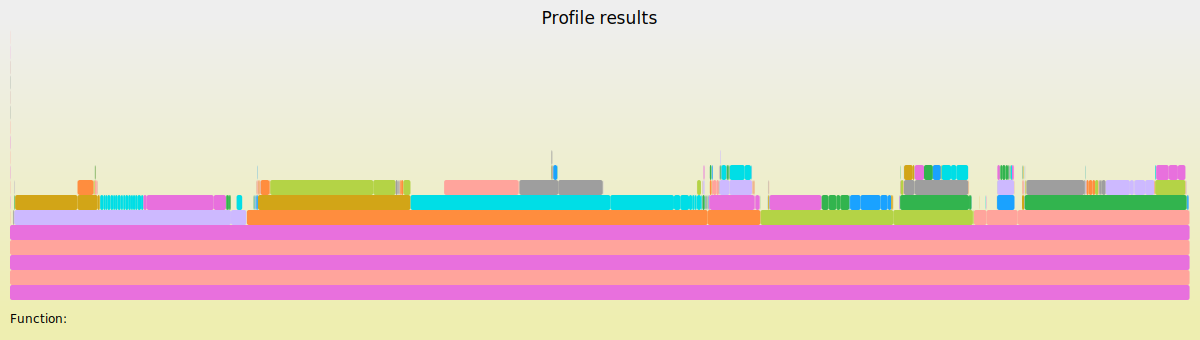

In [23]:
using ProfileView
ProfileView.view()

In [24]:
A=rand(1000,31)

1000×31 Array{Float64,2}:
 0.305774   0.137375   0.172046   0.705853   …  0.947453  0.874713  0.936914 
 0.078874   0.212085   0.386587   0.0499853     0.828538  0.263313  0.139868 
 0.33322    0.575073   0.384405   0.119807      0.566355  0.660179  0.922845 
 0.444573   0.870746   0.885564   0.336848      0.166615  0.62083   0.35082  
 0.36281    0.689265   0.33896    0.822121      0.666718  0.601001  0.887189 
 0.163539   0.298111   0.774623   0.0753378  …  0.251963  0.525893  0.457641 
 0.680703   0.398175   0.838759   0.0151766     0.505598  0.138565  0.261687 
 0.173475   0.133773   0.215782   0.602912      0.542376  0.319097  0.540645 
 0.769395   0.101634   0.190453   0.0775244     0.342375  0.16879   0.855059 
 0.289364   0.801659   0.658673   0.895307      0.70653   0.635941  0.156324 
 0.744146   0.476397   0.333662   0.818312   …  0.114103  0.796178  0.324595 
 0.512069   0.732991   0.746518   0.77672       0.276693  0.573755  0.282778 
 0.233235   0.494879   0.243852   0.86

In [50]:
function t(z,z2) 
  @show m,n = length(z), length(z2)
  @show d = length(z[1])
  A = Array(Float64,m,n)
  @inbounds for a in 1:m, b in 1:n
    s = 0.
    for i in 1:d
      x=(z[a][i]-z2[b][i]) / GynC.model_measerrors[1]
      isnan(x) && continue 
      (s -= x^2)
    end
    A[a,b]=exp(s)
  end
  A
end

zs=[rand(4,31)' for i in 1:3000]
zt=GynC.zt(zs)
@time t(zt,zs)

(m,n) = (length(z),length(z2)) = (3000,3000)
d = length(z[1]) = 124


  8.900549 seconds (10.14 k allocations: 69.080 MB, 1.35% gc time)


3000×3000 Array{Float64,2}:
 3.43343e-127  2.89666e-127  1.34944e-126  …  1.04431e-127  4.74698e-127
 1.64145e-165  1.70531e-165  2.22063e-166     4.87122e-166  6.2949e-166 
 1.52705e-134  7.96247e-135  6.76619e-134     6.60856e-135  3.34996e-134
 6.24599e-186  3.92133e-186  6.3165e-186      9.96854e-186  6.03296e-186
 3.00434e-176  2.28921e-176  3.97343e-177     2.51511e-176  3.14701e-176
 4.71124e-183  4.37967e-183  8.51482e-184  …  1.40462e-183  1.41386e-183
 2.71084e-148  1.08196e-148  1.98342e-148     1.9387e-148   1.19233e-148
 3.83304e-168  1.95141e-168  1.49984e-168     1.56224e-168  4.9013e-168 
 1.12149e-228  5.51938e-229  2.0625e-228      2.00013e-228  2.95804e-228
 1.34894e-119  6.08357e-120  3.2804e-119      9.4062e-120   4.24156e-120
 4.59352e-118  2.65043e-118  9.9237e-118   …  4.48823e-118  1.31294e-118
 1.83825e-218  2.75525e-218  1.48896e-218     2.59289e-218  2.24425e-219
 4.05813e-99   3.66659e-99   1.82256e-98      2.54413e-99   1.00061e-98 
 ⋮                     

In [54]:
function t(z,z2) 
  @show m,n = length(z), length(z2)
  @show d = length(z[1])
  A = Array(Float64,m,n)
  [begin 
    s = 0.
    for i in 1:d
      x=(z[a][i]-z2[b][i]) / GynC.model_measerrors[1]
      isnan(x) && continue 
      (s -= x^2)
    end
    exp(s)
    end for a in 1:m, b in 1:n]
end

zs=[rand(4,31)' for i in 1:3000]
zt=GynC.zt(zs)
@time t(zt,zs)

(m,n) = (length(z),length(z2)) = (3000,3000)
d = length(z[1]) = 124


590.405797 seconds (8.95 G allocations: 150.206 GB, 8.98% gc time)


3000×3000 Array{Float64,2}:
 1.38584e-196  5.8121e-196   4.67273e-196  …  1.02953e-195  1.4908e-196 
 1.12963e-227  4.76739e-227  7.32015e-227     6.03306e-227  4.70476e-228
 1.40031e-208  1.87306e-208  2.21951e-209     9.76958e-209  6.93404e-209
 5.46998e-158  8.76586e-159  7.60221e-158     8.20549e-158  4.51631e-158
 5.27104e-140  3.89879e-139  3.48299e-140     4.3697e-140   6.88977e-140
 2.29299e-133  1.2188e-131   4.48219e-132  …  3.80268e-132  2.16087e-132
 1.2434e-224   1.52011e-226  2.53098e-226     1.3837e-226   2.95623e-226
 3.92956e-216  4.00234e-217  3.37787e-217     7.03612e-217  4.37312e-217
 7.29312e-157  3.76928e-157  1.43964e-156     6.2993e-157   4.55454e-158
 1.59275e-167  5.18264e-168  2.71146e-168     6.28826e-169  5.73812e-168
 2.33962e-101  2.34922e-101  1.74921e-101  …  1.72031e-101  2.78705e-101
 3.11472e-155  1.15895e-154  2.43444e-155     2.23076e-155  1.45492e-155
 1.22951e-182  7.23813e-182  2.8002e-182      2.26089e-183  2.8385e-182 
 ⋮                     

In [56]:
@code_warntype t(zs,zs)

Variables:
  #self#::#t
  z::Array{Array{Float64,2},1}
  z2::Array{Array{Float64,2},1}
  m::Int64
  n::Int64
  #temp#::Int64
  value@_7::Tuple{Int64,Int64}
  d::CORE.BOX
  value@_9::Int64
  A::Array{Float64,2}
  #81::##81#82{Array{Array{Float64,2},1},Array{Array{Float64,2},1}}
  s@_12::Base.AbstractIOBuffer{Array{UInt8,1}}
  s@_13::Base.AbstractIOBuffer{Array{UInt8,1}}

Body:
  begin 
      d::CORE.BOX = $(Expr(:new, :(Core.Box)))
      SSAValue(0) = "(m,n) = (length(z),length(z2)) = "
      # meta: location show.jl # line 218:
      SSAValue(1) = (Core.tuple)((Base.arraylen)(z::Array{Array{Float64,2},1})::Int64,(Base.arraylen)(z2::Array{Array{Float64,2},1})::Int64)::Tuple{Int64,Int64}
      SSAValue(2) = SSAValue(1)
      #temp#::Int64 = $(QuoteNode(1))
      SSAValue(30) = (Base.getfield)(SSAValue(2),1)::Int64
      SSAValue(31) = (Base.box)(Int64,(Base.add_int)(1,1))
      m::Int64 = SSAValue(30)
      #temp#::Int64 = SSAValue(31)
      SSAValue(32) = (Base.getfield)(SSAValue(2),2):

In [36]:
t(zs) = t(zs,zs)
Profile.clear()
@profile t(zs)
Profile.print()

(m,n) = (length(z),length(z2)) = (1000,1000)
d = length(z[1]) = 124


1069 ./task.jl:360; (::IJulia.##9#15)()
 1069 ...Julia/src/eventloop.jl:8; eventloop(::ZMQ.Socket)
  1069 ...rc/execute_request.jl:169; execute_request(::ZMQ.Socket, ::...
   1069 ./loading.jl:441; include_string(::String, ::String)
    1069 ./<missing>:?; anonymous
     1069 ./profile.jl:16; macro expansion;
      34  ./In[35]:4; t(::Array{Array{Float64,2},1},...
      3   ./In[35]:5; t(::Array{Array{Float64,2},1},...
      165 ./In[35]:7; t(::Array{Array{Float64,2},1},...
      448 ./In[35]:8; t(::Array{Array{Float64,2},1},...
      117 ./In[35]:9; t(::Array{Array{Float64,2},1},...
      261 ./In[35]:10; t(::Array{Array{Float64,2},1},...
      32  ./In[35]:12; t(::Array{Array{Float64,2},1},...


In [73]:
t(zs,zs)

LoadError: LoadError: ArgumentError: invalid index: 0.0
while loading In[73], in expression starting on line 1

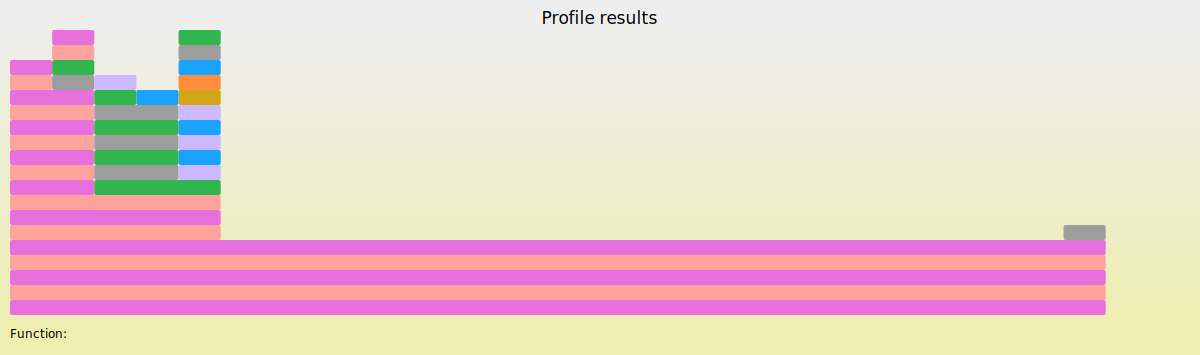

In [51]:
ProfileView.view()

In [40]:
@time for x in zs, y in zt
    a=!isnan(x)
    exp(sumabs2(x[a]-y[a]))
    end

  4.689200 seconds (15.50 M allocations: 3.614 GB, 15.84% gc time)


In [31]:
@time GynC.Lzz(zs,zt)

  7.248147 seconds (33.00 M allocations: 4.239 GB, 18.51% gc time)


1000×1000 Array{Float64,2}:
 1.3677e-64   3.00284e-56  8.60661e-66  …  1.91299e-55  1.14828e-58
 9.85267e-66  1.57038e-50  3.79015e-66     1.40909e-56  3.18994e-58
 5.18226e-64  5.30618e-55  3.20105e-61     2.41819e-57  6.33911e-58
 1.48315e-63  3.01186e-59  5.03817e-69     1.36167e-60  4.96303e-58
 1.4255e-64   1.7236e-56   5.21426e-64     5.9008e-56   2.34093e-57
 2.37756e-65  2.16403e-57  1.29737e-68  …  7.74288e-53  2.21016e-60
 1.06617e-66  9.39644e-54  9.04417e-67     5.045e-56    1.66341e-60
 3.53251e-65  4.2605e-58   8.4854e-66      2.46186e-56  6.02984e-59
 6.20591e-65  1.71352e-54  1.03734e-66     1.06484e-56  1.34153e-60
 2.86995e-69  4.26374e-57  7.93293e-64     5.55996e-58  1.84801e-56
 2.32363e-66  1.35794e-55  5.06937e-64  …  3.00316e-57  1.31016e-57
 4.66677e-65  1.4763e-54   7.27561e-65     2.38758e-57  1.06657e-59
 2.26792e-67  8.86431e-55  1.38048e-67     1.00854e-59  1.24923e-56
 ⋮                                      ⋱                          
 9.01681e-68  1.0037